## ELO score exploration
This notebook explores some characteristics of the codeforces ELO scoring system. It was initially created
while I thought about possible Bayesian approaches using logistic probability distributions. While this approach
was ultimately abandoned, ELO scores were used to calculate the "contest performance" features for both ensemble and linear regressors.

In [78]:
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import scipy
import psycopg2
con = psycopg2.connect(database='codeforces', user='Joy')
%matplotlib inline
plt.rcParams['figure.figsize'] = (8.0, 8.0)
plt.rcParams['figure.facecolor'] = 'white'

In [123]:
def p_AbeatsB(a, b):
    a = float(a)
    b = float(b)
    return 1.0 / ( 1 + 10**( (b - a) / 400) )

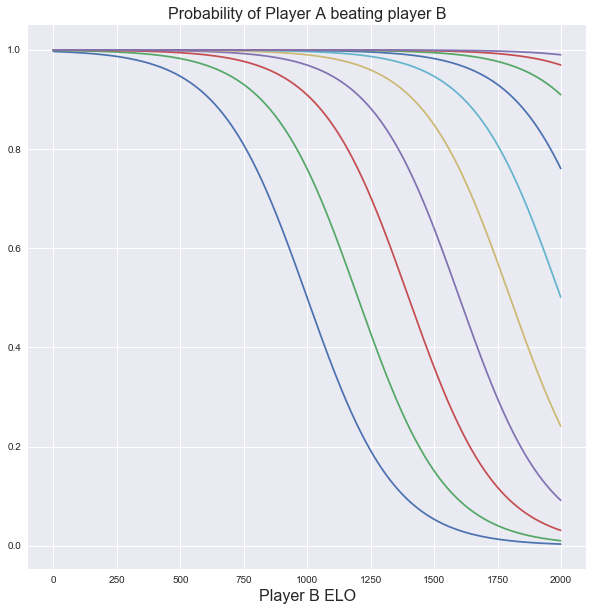

In [19]:
#a = 1000
for a in range(1000, 3000, 200):
    b = [p_AbeatsB(a, bb) for bb in range(2000)]
    plt.plot(b)
    plt.xlabel('Player B ELO', fontsize=16)
    plt.title('Probability of Player A beating player B', fontsize=16)

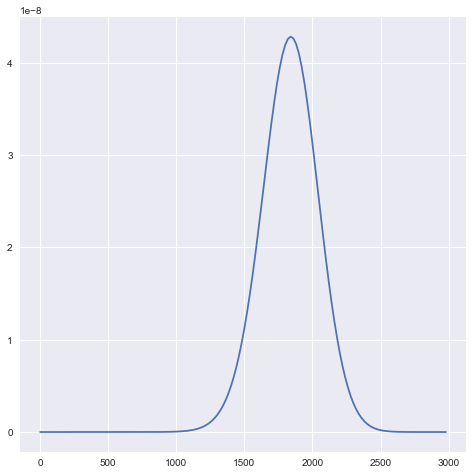

In [132]:
problems = [1000, 1500, 1800, 1900, 2200, 500, 2500, 2500]
solves = [1, 1, 0, 0, 0, 0, 1, 1]

likelihood = []
user_ratings = range(0, 3000, 20)

const = 1.0
for user_rating in user_ratings:
    l = 1
    for p, s in zip(problems, solves):
        if s:
            prob = p_AbeatsB(user_rating/const, p/const)
        else:
            prob = 1 - p_AbeatsB(user_rating/const, p/const)
        l *= prob
    likelihood.append(l)
plt.plot(user_ratings, likelihood)

[  1.28490976e+02   2.25423450e-05   1.83769279e+03]


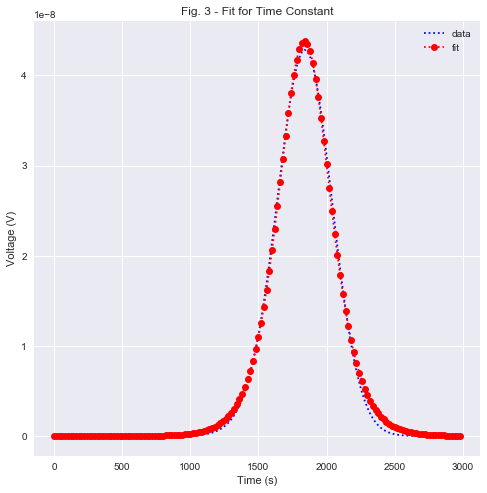

In [133]:
import pylab as plb
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import math
from scipy import asarray as ar,exp

x = ar(user_ratings)
y = ar(likelihood)

n = len(x)
mean = sum(x*y)/n
sigma = sum(y*(x-mean))/n

def logistic(x, s, a, x0):
    glob = exp(-(x-x0)/s)
    return a * glob / (s * (1 + glob)**2)

popt,pcov = curve_fit(logistic, x, y, p0=[400, 1, mean])
print popt

plt.plot(x,y,'b+:',label='data')
plt.plot(x,logistic(x,*popt),'ro:',label='fit')
plt.legend()
plt.title('Fig. 3 - Fit for Time Constant')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.show()